<a href="https://colab.research.google.com/github/himanshuarora1703/Tutorial-notebooks/blob/main/Feature%20Transformation/Power_transformer_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/concrete_data.csv')

In [3]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
# check for missing values

df.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [5]:
# check the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
# make X and y
X = df.drop(columns='Strength')
y = df['Strength']


In [8]:
# do train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

X_train.shape,X_test.shape

((824, 8), (206, 8))

In [9]:
from scipy.stats import probplot 

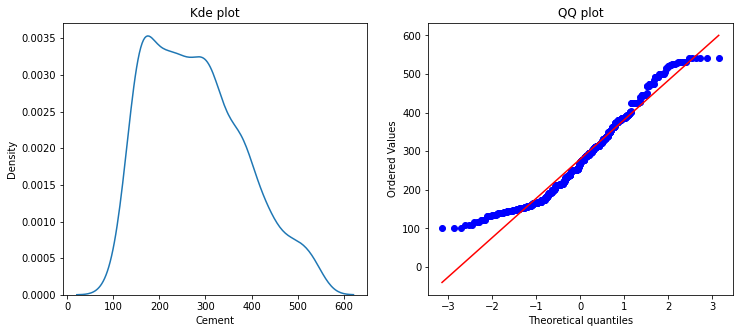

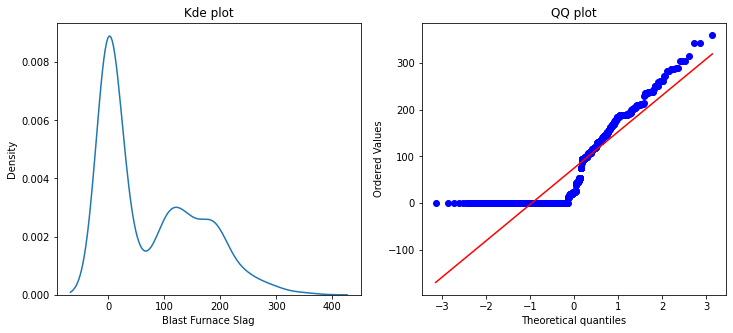

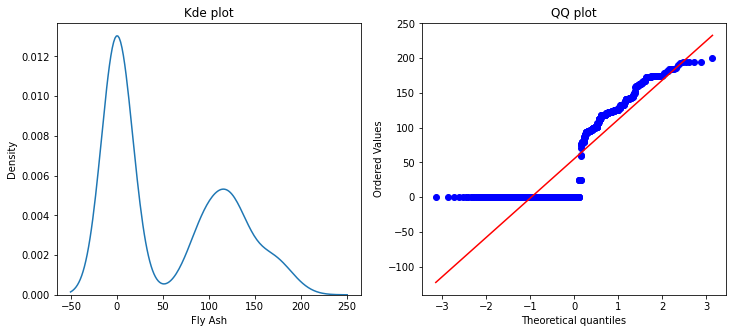

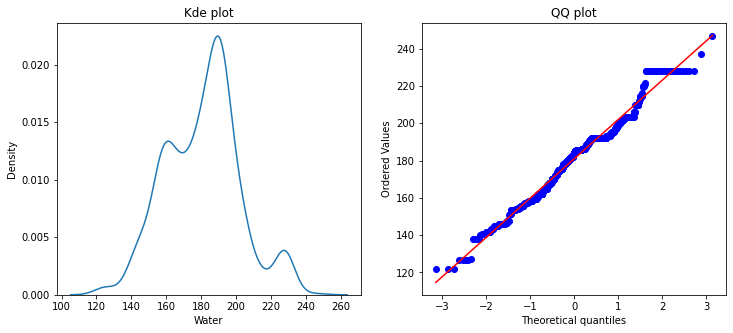

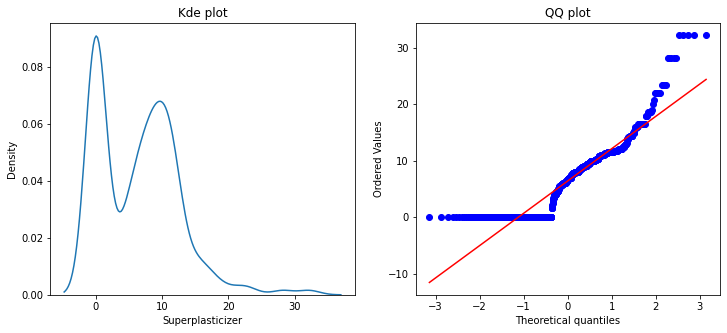

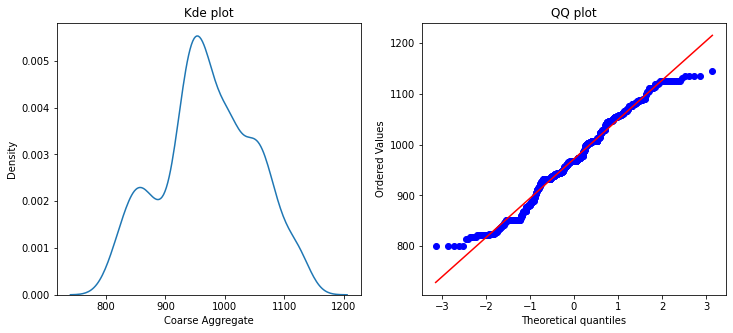

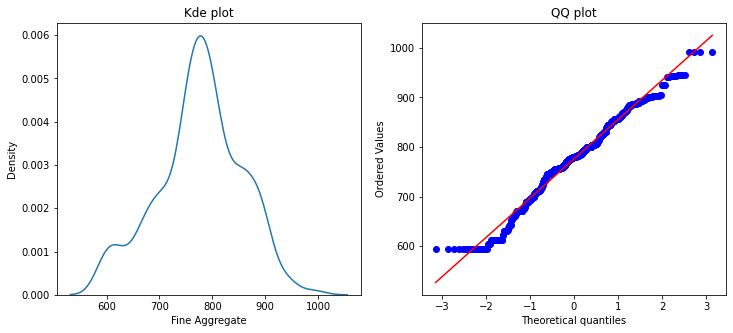

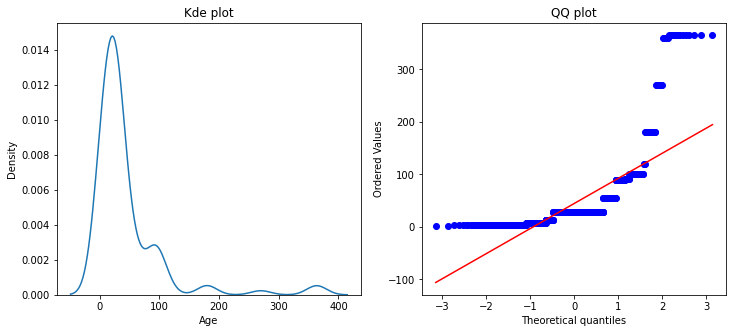

In [11]:
cols = X_train.columns
for col in cols:
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  sns.kdeplot(x=col,data=X_train)
  plt.title('Kde plot')

  plt.subplot(1,2,2)
  probplot(X_train[col],plot=plt)
  plt.title('QQ plot')


In [12]:
# train linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print('The r2 score is',r2_score(y_test,y_pred))

The r2 score is 0.6489002467037758


In [34]:
# transform the columns using box-cox

from sklearn.preprocessing import PowerTransformer
trans = PowerTransformer(method='box-cox')

X_train_trans = trans.fit_transform(X_train+0.000001)
X_test_trans = trans.transform(X_test+0.0000001)

In [35]:
# lambda values for box-cox transformation
s1 = pd.Series(trans.lambdas_,index=cols,name='box-cox')
s1

Cement                0.161616
Blast Furnace Slag    0.034248
Fly Ash              -0.029391
Water                 0.734291
Superplasticizer      0.109633
Coarse Aggregate      1.252471
Fine Aggregate        1.741326
Age                   0.044376
Name: box-cox, dtype: float64

In [16]:
# Train the model again and check score after transformation

# train linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train_trans,y_train)
y_pred = lr.predict(X_test_trans)

print('The r2 score is',r2_score(y_test,y_pred))

The r2 score is 0.795302892381811


In [17]:
# make dataframe of X_train_trans
X_train_trans = pd.DataFrame(X_train_trans,columns=cols)

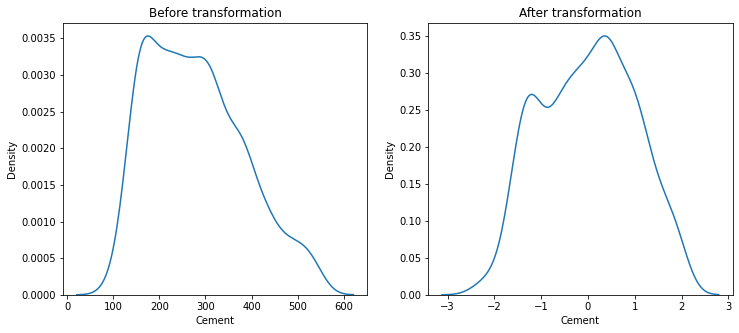

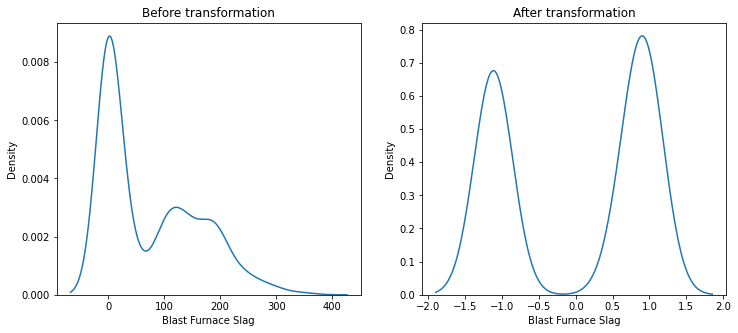

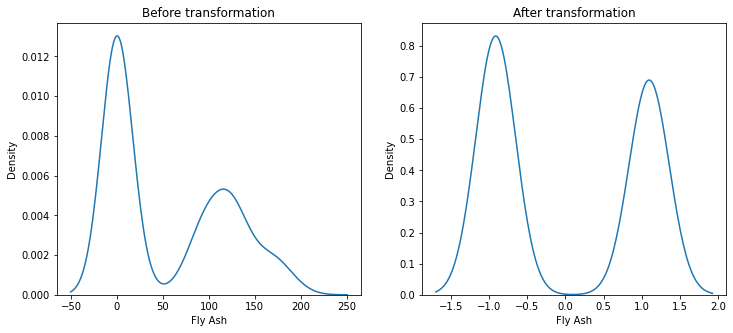

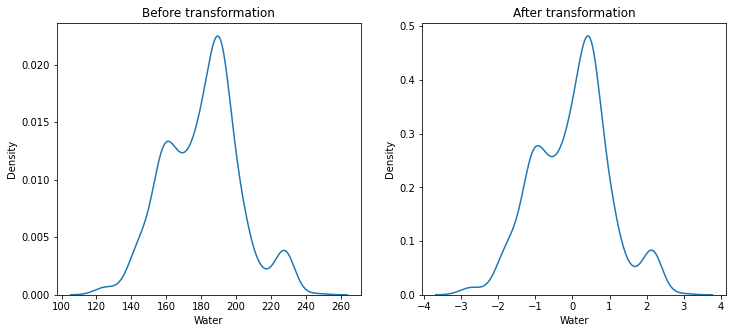

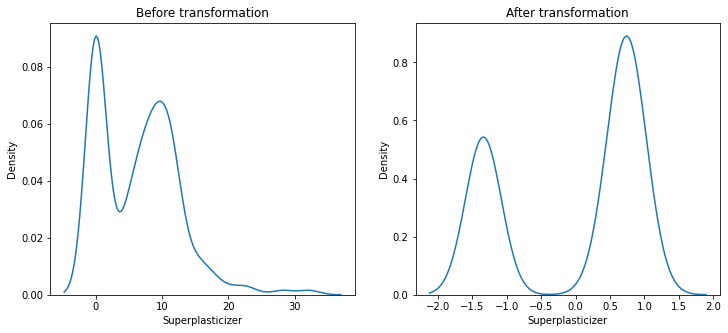

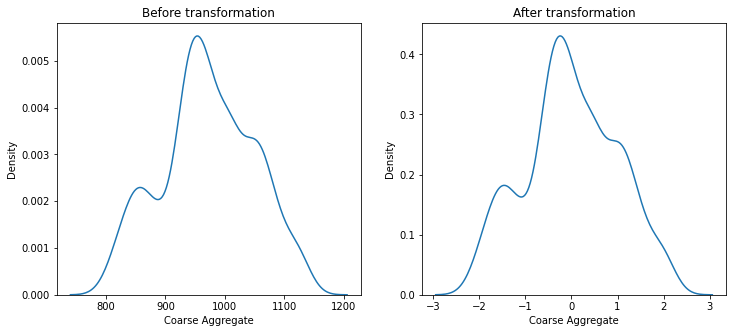

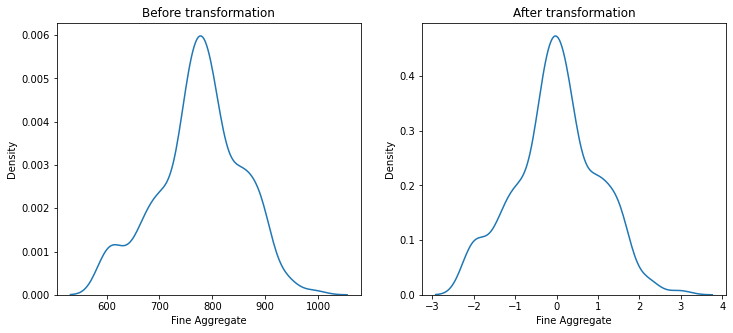

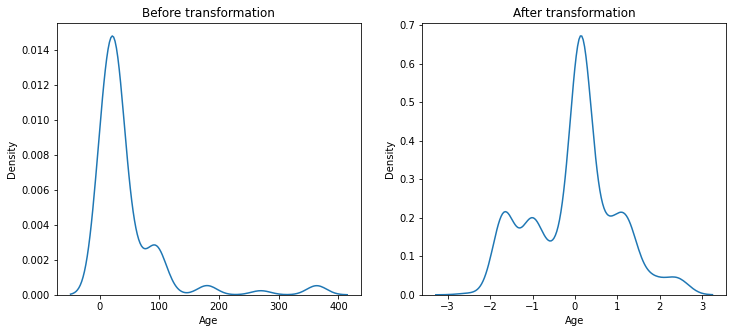

In [18]:
for col in cols:
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  sns.kdeplot(x=col,data=X_train)
  plt.title('Before transformation')

  plt.subplot(1,2,2)
  sns.kdeplot(x=col,data=X_train_trans)
  plt.title('After transformation')


In [36]:
# Apply yeo-johnson

from sklearn.preprocessing import PowerTransformer
trans = PowerTransformer()

X_train_trans = trans.fit_transform(X_train)
X_test_trans = trans.transform(X_test)

In [20]:
# Train the model again and check score after transformation

# train linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train_trans,y_train)
y_pred = lr.predict(X_test_trans)

print('The r2 score is',r2_score(y_test,y_pred))

The r2 score is 0.8033545240282287


In [21]:
# make dataframe of X_train_trans
X_train_trans = pd.DataFrame(X_train_trans,columns=cols)

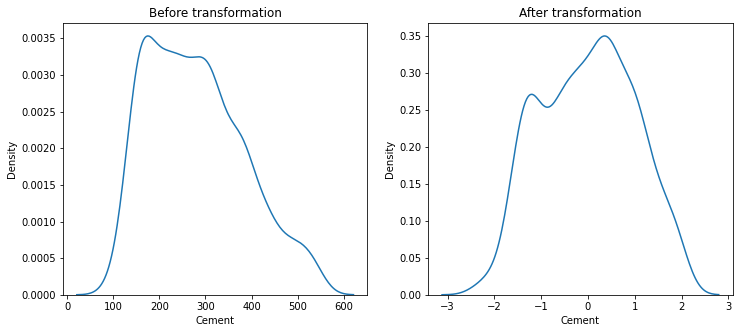

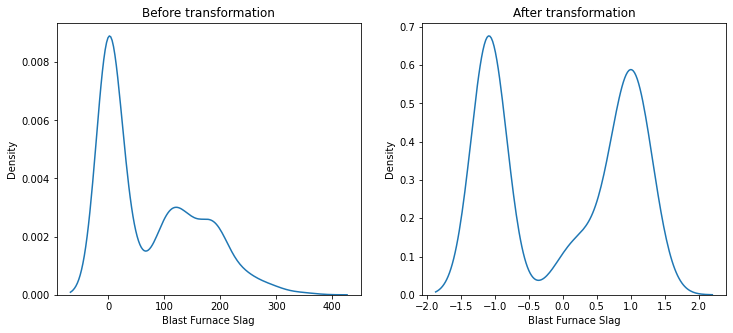

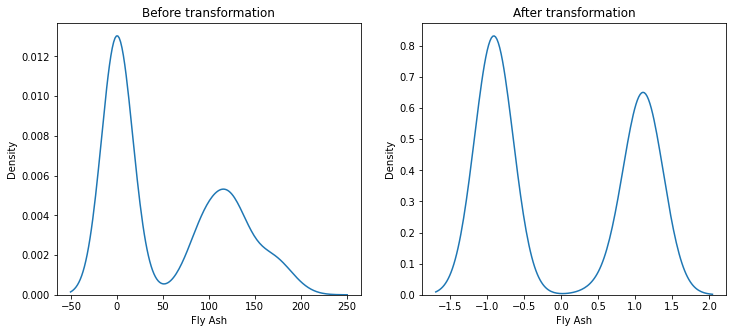

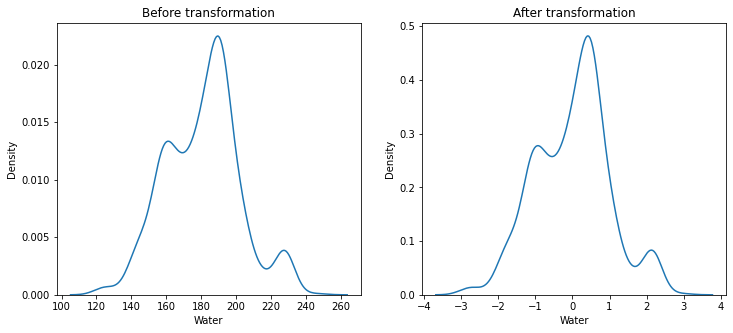

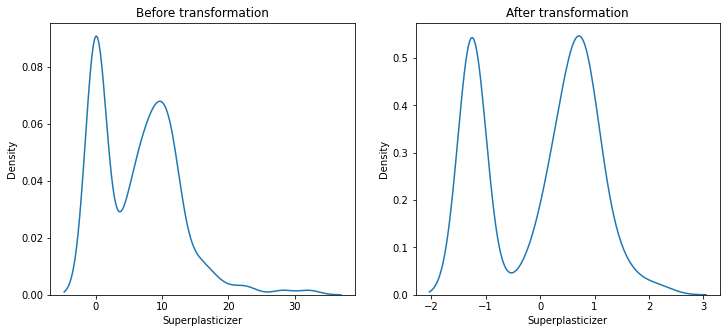

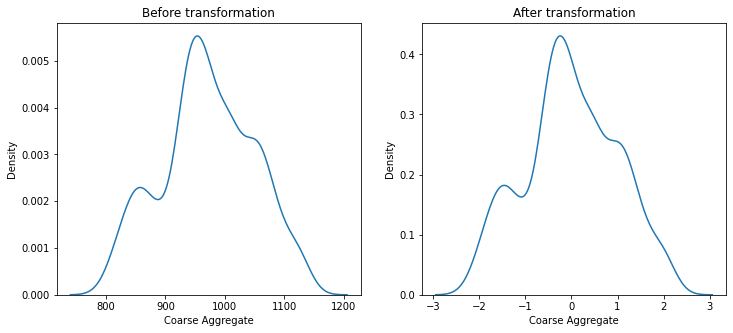

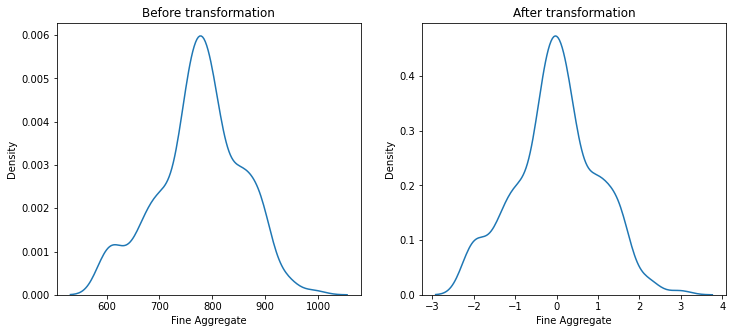

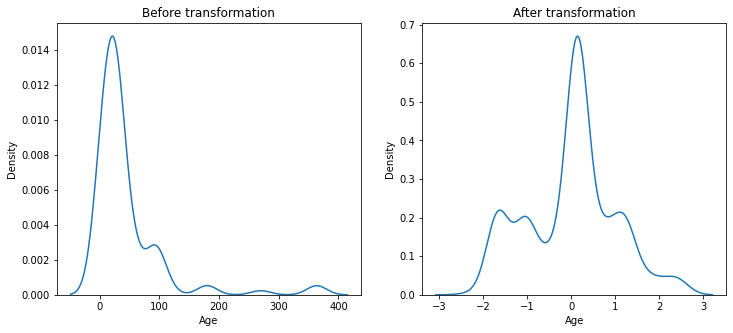

In [22]:
for col in cols:
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  sns.kdeplot(x=col,data=X_train)
  plt.title('Before transformation')

  plt.subplot(1,2,2)
  sns.kdeplot(x=col,data=X_train_trans)
  plt.title('After transformation')

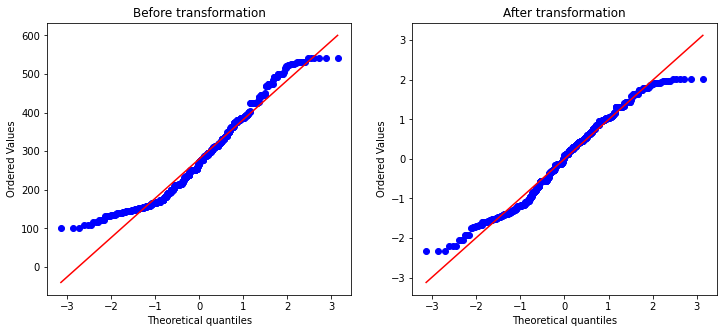

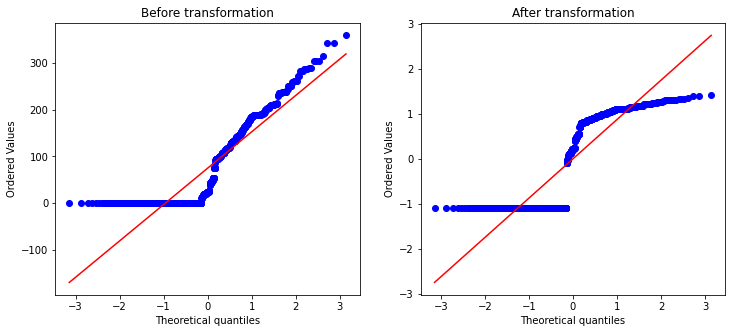

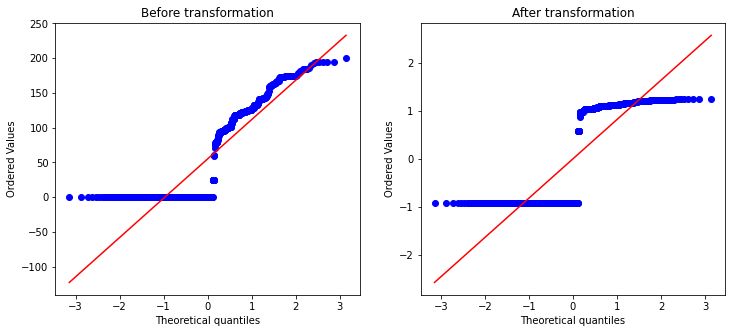

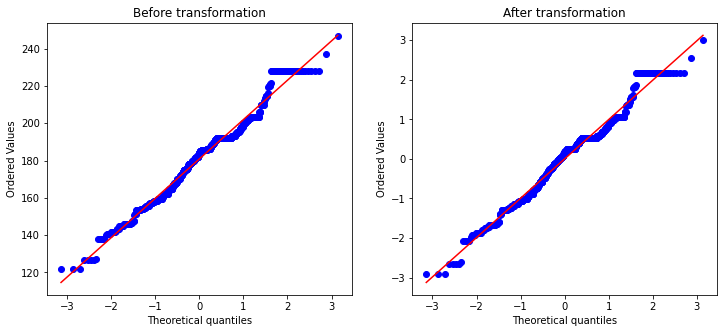

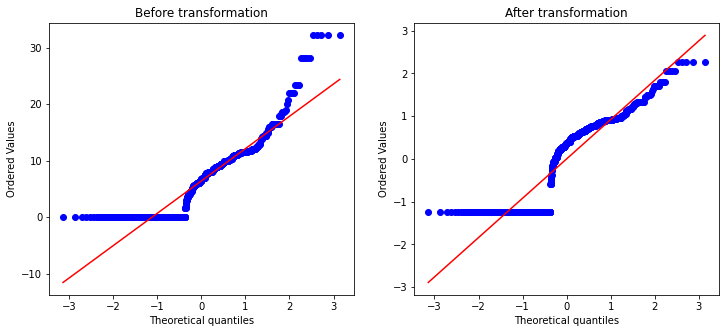

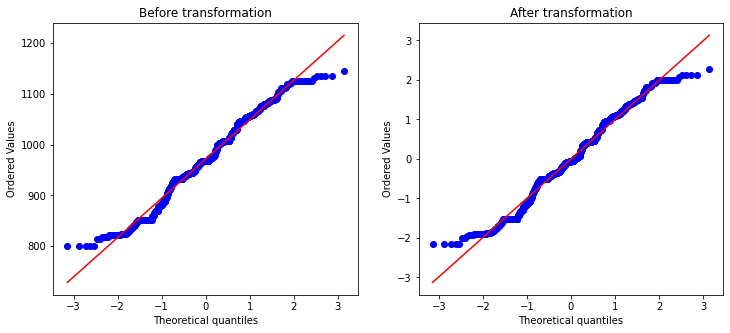

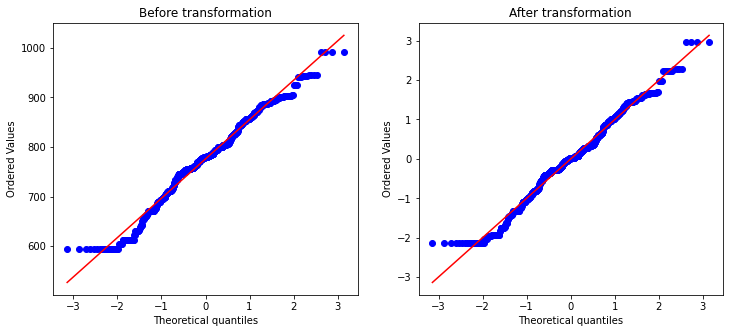

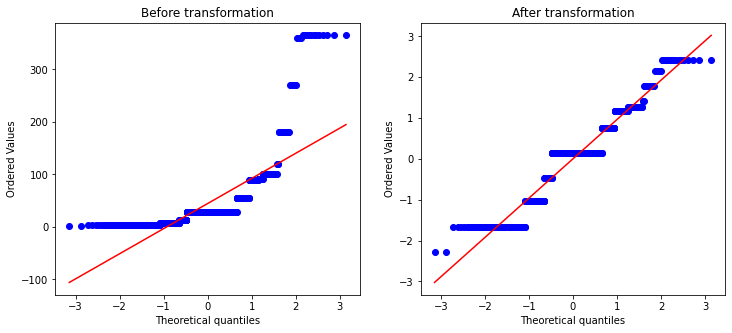

In [23]:
for col in cols:
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  probplot(X_train[col],plot=plt)
  plt.title('Before transformation')

  plt.subplot(1,2,2)
  probplot(X_train_trans[col],plot=plt)
  plt.title('After transformation')

In [37]:
#lamda values for yeo-johnson

s2 = pd.Series(trans.lambdas_,index=cols,name='yeo-johnson')
s2

Cement                0.158843
Blast Furnace Slag    0.039888
Fly Ash              -0.125281
Water                 0.732807
Superplasticizer      0.287183
Coarse Aggregate      1.252832
Fine Aggregate        1.742350
Age                  -0.004083
Name: yeo-johnson, dtype: float64

In [38]:
# comparison of lambda values of both the transformation

pd.concat([s1,s2],join='inner',axis=1)

,box-cox,yeo-johnson
Cement,0.161616,0.158843
Blast Furnace Slag,0.034248,0.039888
Fly Ash,-0.029391,-0.125281
Water,0.734291,0.732807
Superplasticizer,0.109633,0.287183
Coarse Aggregate,1.252471,1.252832
Fine Aggregate,1.741326,1.742350
Age,0.044376,-0.004083
